## Importation des modules nécessaires et du fichier CSV à étudier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

modified_train = pd.read_csv("/home/apprenant/Brief-7-Taxi-NYC-1/data/modified_train.csv")

## Calcul des indicateurs demandés

### 1 - Vitesse moyenne de chaque trajet (en km/h)

In [2]:
modified_train['taxi_trip_speed'] = modified_train['Distance'] / modified_train['trip_duration_hours']
modified_train.head()
mean_taxi_trip_speed = round(modified_train['taxi_trip_speed'].mean(), ndigits=4)
print('La vitesse moyenne de chaque trajet est de {} km/h'.format(mean_taxi_trip_speed))

La vitesse moyenne de chaque trajet est de 14.3144 km/h


### 2 - Nombre de trajets effectués en fonction du jour de la semaine

{'Monday': 183444, 'Tuesday': 198832, 'Wednesday': 206183, 'Thursday': 214324, 'Friday': 219076, 'Saturday': 215887, 'Sunday': 190472}


<AxesSubplot:>

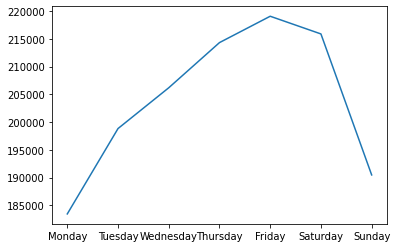

In [3]:
test = modified_train.week_day.value_counts()
days = {"Monday" : 0, "Tuesday" : 0, "Wednesday" : 0, "Thursday" : 0, "Friday" : 0, "Saturday" : 0, "Sunday" : 0}
for x in test.keys() :
    days[x] = test[x]
print(days)
sns.lineplot(x=days.keys(), y=days.values())

### 3 - Nombre de trajets effectués en fonction de l’horaire de la journée par tranche de 4h

In [4]:
modified_train['pickup_hour'] = modified_train['pickup_datetime'].apply(lambda x : str(x)[11:13])
modified_train['pickup_hour'] = modified_train['pickup_hour'].apply(lambda x : int(x))
ranges = [-1, 3, 7, 11, 15, 19, 23]
number_of_trips_per_hour = modified_train['pickup_hour'].value_counts(bins=ranges, sort=False)
loop_range = [0, 4, 8, 12, 16, 20]
for i in loop_range:
    print('Entre {}h et {}h, {} trajets ont été effectués'.format(i, i+4, number_of_trips_per_hour[i+1]))

Entre 0h et 4h, 136726 trajets ont été effectués
Entre 4h et 8h, 115821 trajets ont été effectués
Entre 8h et 12h, 263567 trajets ont été effectués
Entre 12h et 16h, 283952 trajets ont été effectués
Entre 16h et 20h, 315569 trajets ont été effectués
Entre 20h et 24h, 312583 trajets ont été effectués


### 4 - Nombre de km parcourus par jour de la semaine

In [5]:
DayKM = modified_train[["week_day", "Distance"]]
groupDK = DayKM.groupby("week_day")
print(groupDK.sum())

            Distance
week_day            
Friday     755558.59
Monday     665159.51
Saturday   731153.63
Sunday     722763.09
Thursday   743692.89
Tuesday    675267.61
Wednesday  698770.95


## Enregistrement du nouveau jeu de données

In [6]:
modified_train.to_csv('/home/apprenant/Brief-7-Taxi-NYC-1/data/modified_train2.csv')